In [18]:
import matplotlib.pyplot as plt
import cv2

In [19]:
# 모자이크 처리함수 정의
def mosaic(img, rect, size):
    # 모자이크 적용할 부분 추출하기
    (x1, y1, x2, y2) = rect
    w = x2 - x1
    h = y2 - y1
    i_rect = img[y1:y2, x1:x2]
    # 축소하고 확대하기
    i_small = cv2.resize(i_rect, ( size, size))
    i_mos = cv2.resize(i_small, (w, h), interpolation=cv2.INTER_AREA)
    # 모자이크 적용하기
    img2 = img.copy()
    img2[y1:y2, x1:x2] = i_mos
    return img2

In [20]:
# 캐스케이드 파일 지정해서 검출기 생성하기 --- (*1)
cascade_file = "data/haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

In [21]:
# 이미지를 읽어 들이고 그레이스케일로 변환하기 --- (*2)
img = cv2.imread("data/family.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [22]:
# 얼굴 검출하기 --- (*3)
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
if len(face_list) == 0: quit()

In [23]:
face_list

array([[579, 312, 191, 191],
       [290,  98, 227, 227]], dtype=int32)

In [24]:
# 인식한 부분에 모자이크 처리하기 --- (*4)
for (x,y,w,h) in face_list:
    img = mosaic(img, (x, y, x+w, y+h), 10)

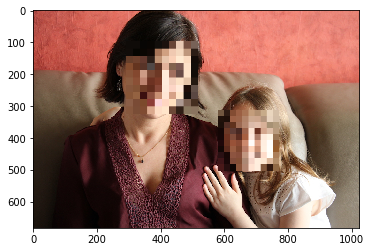

In [25]:
# 이미지 출력하기
cv2.imwrite('data/family-mosaic.jpg', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))